In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
import datetime as dt
import natsort 
import glob

In [2]:
def rebin(hx,h, bin=1):
    h_rebin = []
    for i,x in enumerate(h[:int(len(h)/bin)]):
        num = i*bin
        h_rebin.append(h[num]+h[num+1])
    hx_rebin = [x for x in range(int(len(hx)/bin))]
    return np.array(hx_rebin), np.array(h_rebin)

In [3]:
def gauss(x,a,mu,sigma):
    return (a*np.exp(-0.5*((x-mu)/sigma)**2))

def exp(x,h,b,c):
    return(h*np.exp(-x*b)+c)

def func(x,h,b,c,a,mu,sigma):
    return(h*np.exp(-x*b)+c+(a*np.exp(-0.5*((x-mu)/sigma)**2)))

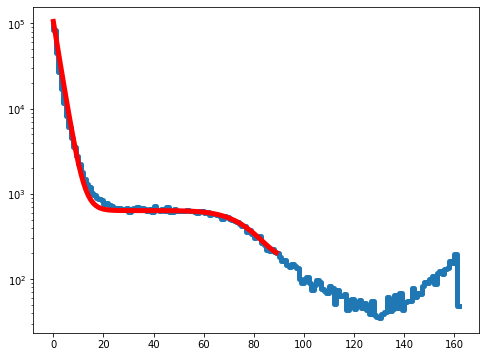

In [4]:
dir='/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20220117/source_data_32V/'
filename=[]
count_sum=0
channel_sum=0
for filenames in os.listdir(dir):
    filename.append(dir+filenames)
for files in natsort.natsorted(filename):
    df=pd.read_csv(files,skiprows=1)
    count_sum+=df['Counts']
    channel_sum+=df['Channel']
    
hx,h=rebin(np.array(channel_sum),np.array(count_sum),100)
cut=np.where((hx>=0) & (hx<90))
popt,pcov=curve_fit(func,hx[cut],h[cut],p0=[np.max(h[cut]),0.1,2,np.max(h[cut]),50,10],maxfev=100000)
plt.figure(figsize=(8,6))
plt.plot(hx[cut],func(hx[cut],*popt),color='r',zorder=10,label='Fit',lw=5)
plt.step(hx,h,lw=5)
plt.yscale('log')
plt.show()

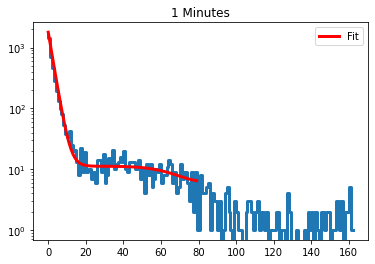

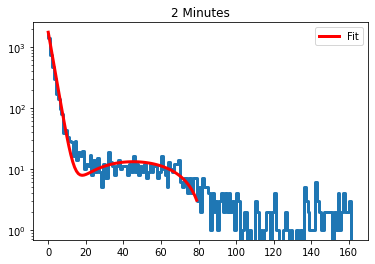

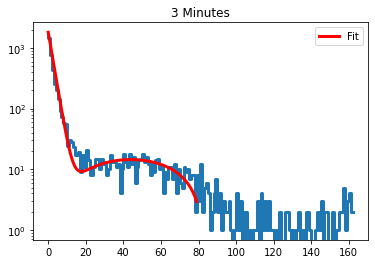

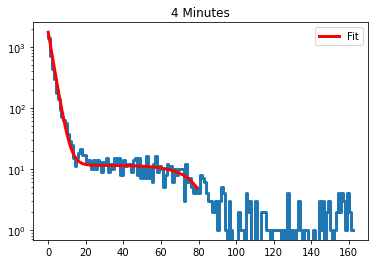

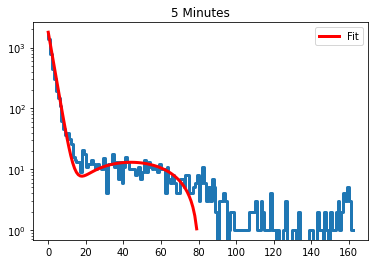

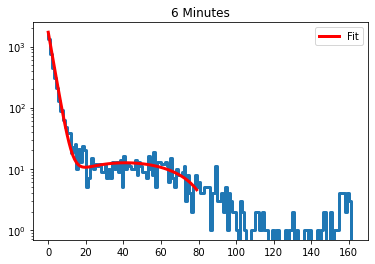

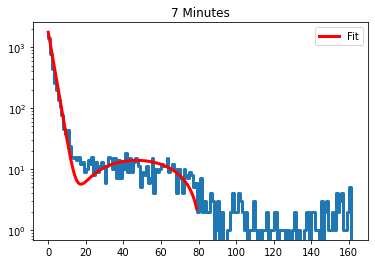

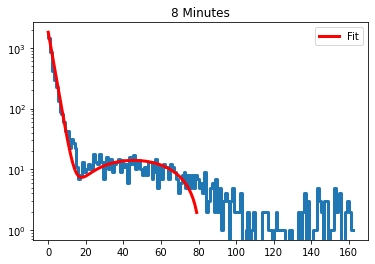

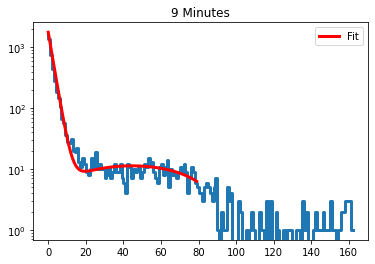

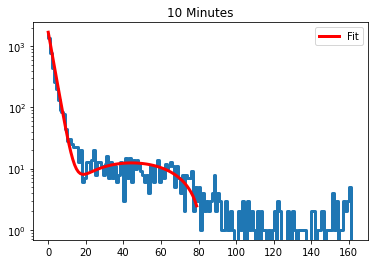

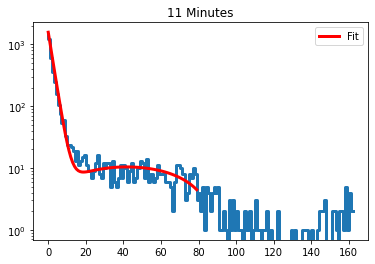

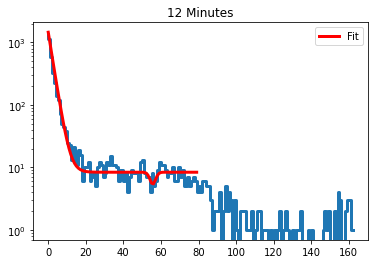

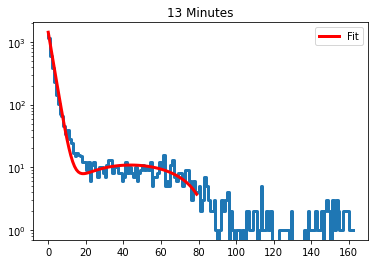

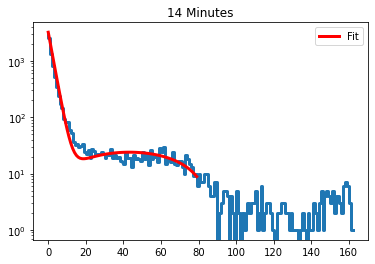

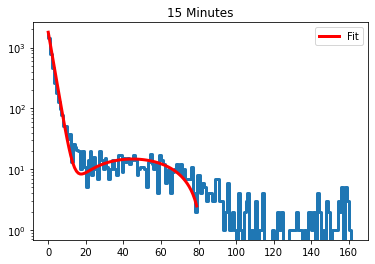

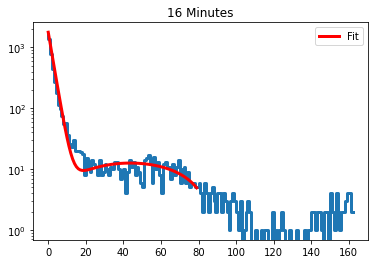

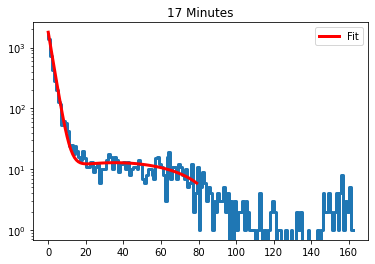

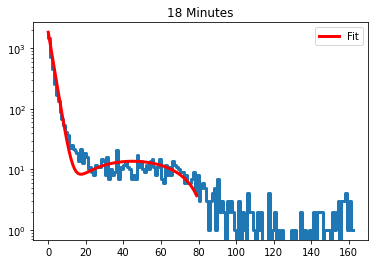

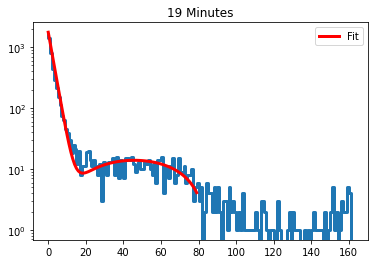

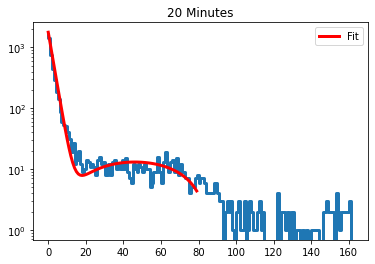

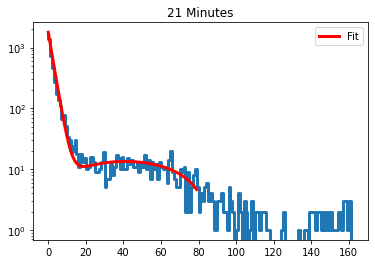

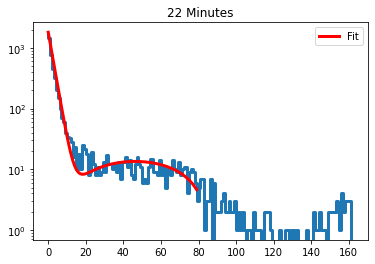

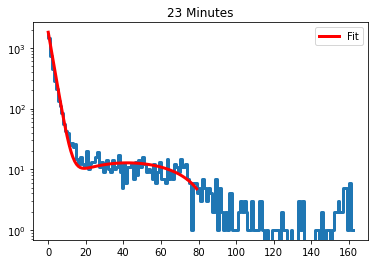

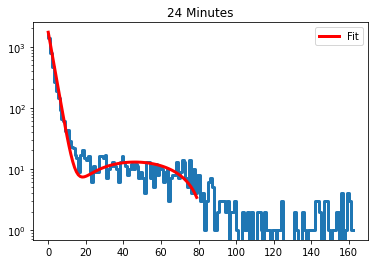

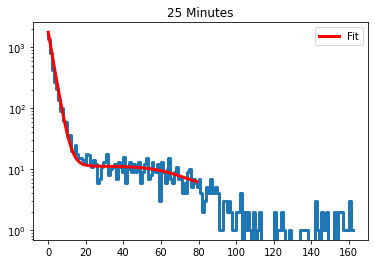

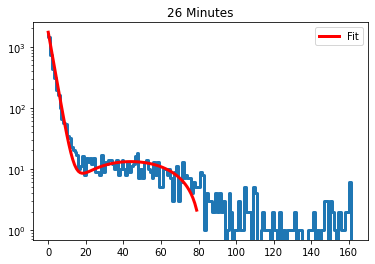

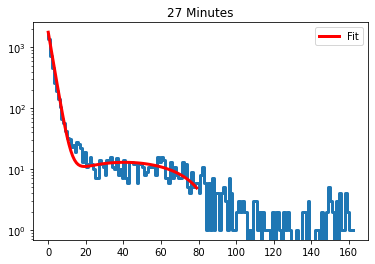

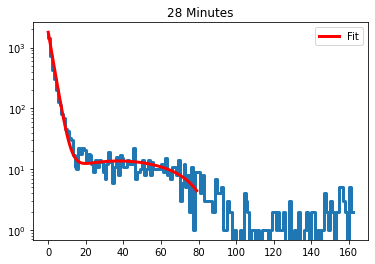

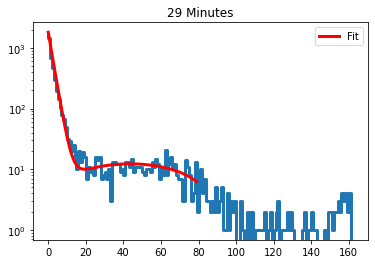

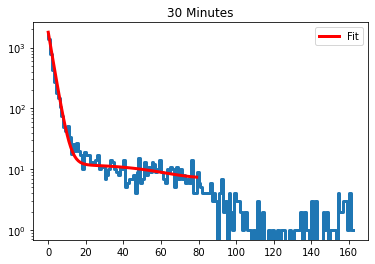

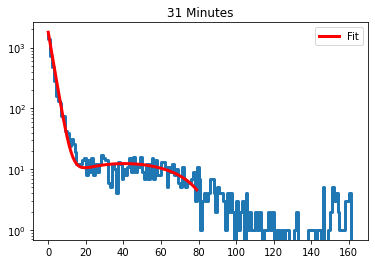

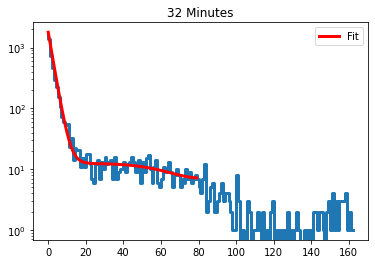

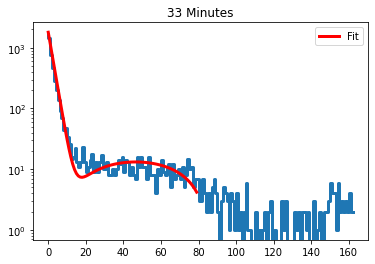

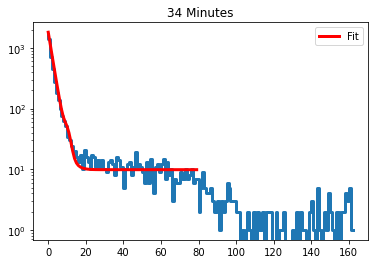

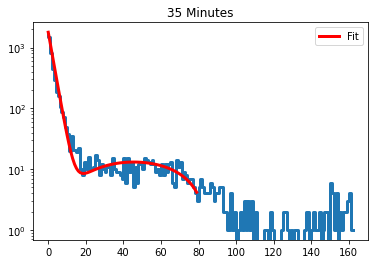

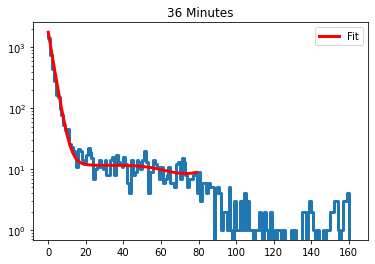

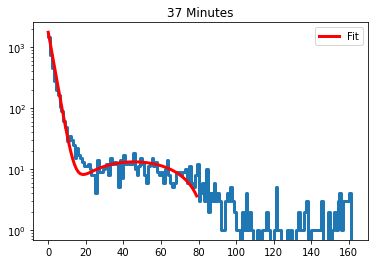

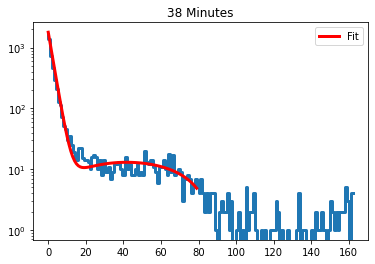

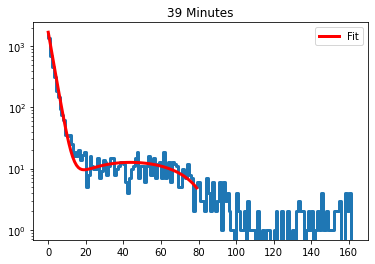

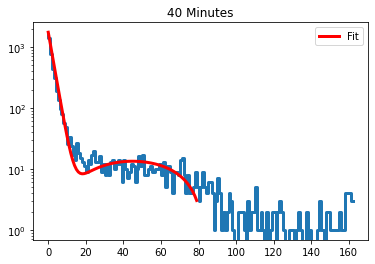

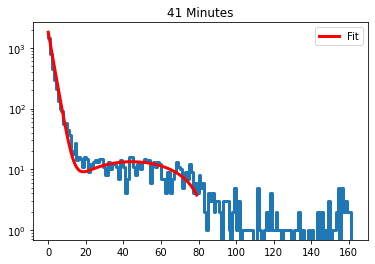

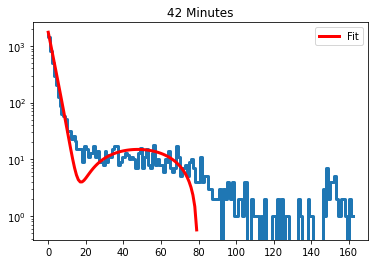

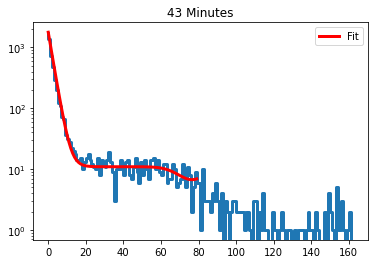

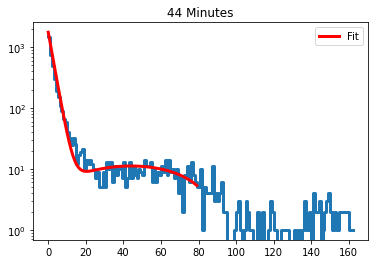

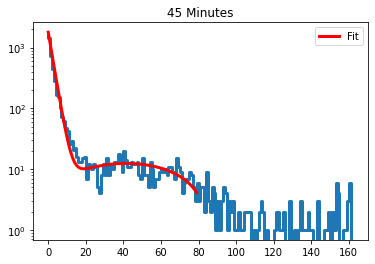

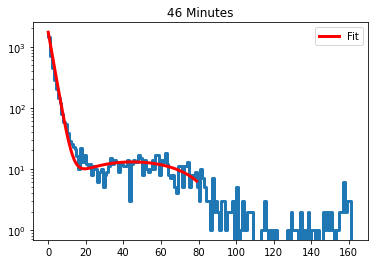

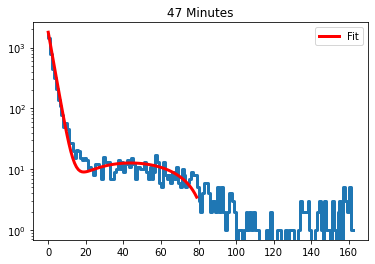

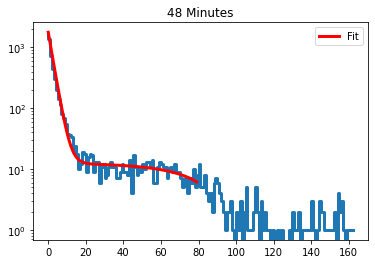

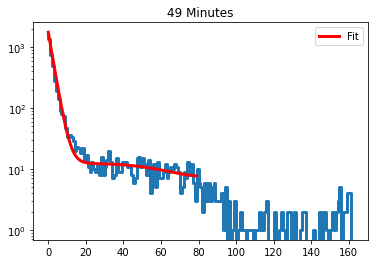

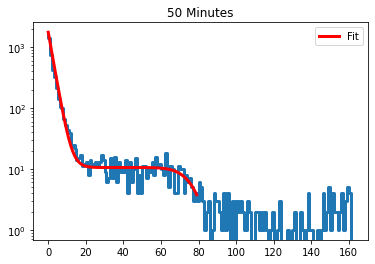

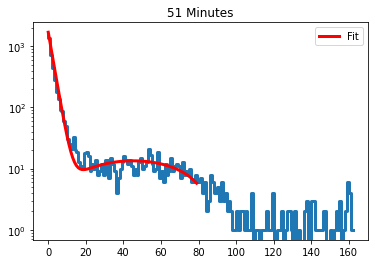

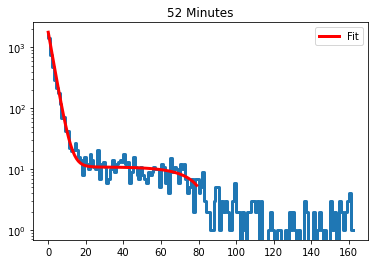

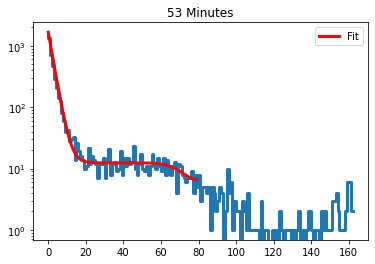

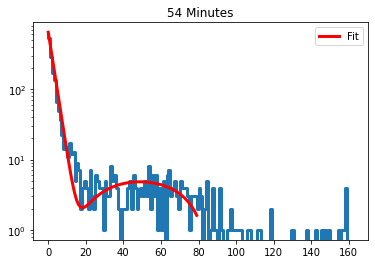

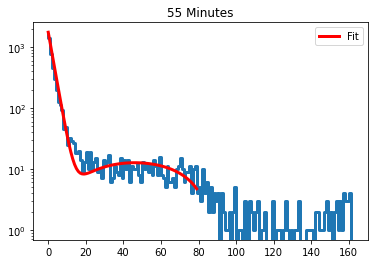

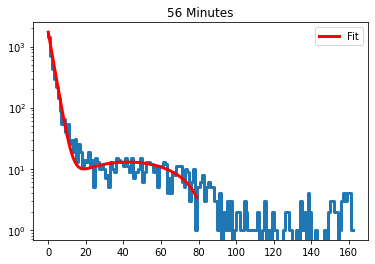

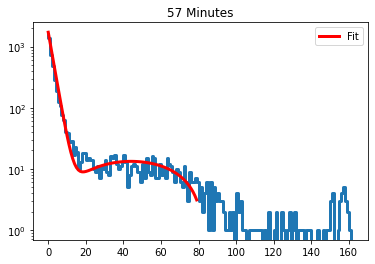

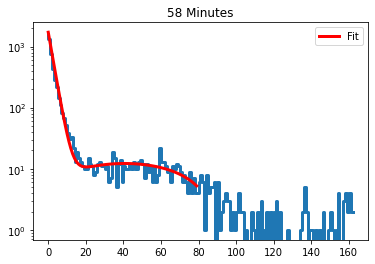

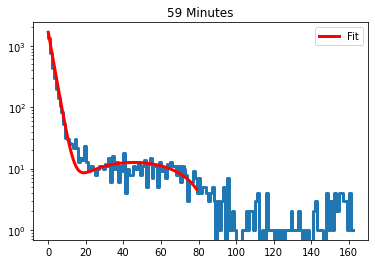

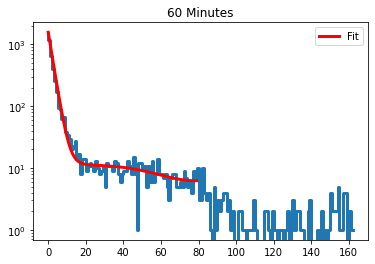

In [5]:
dir='/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20220117/source_data_32V/'
filename=[]
time_s=[]
popt_list=[]
pcov_list=[]
for filenames in os.listdir(dir):
    filename.append(dir+filenames)
for file in natsort.natsorted(filename):
    df=pd.read_csv(file)
    time=(str(round(int(df.columns[1])/60))+' Minutes')
    time_s.append(int(df.columns[1]))
    df=pd.read_csv(file,skiprows=1)
    hx,h=rebin(np.array(df['Channel']),np.array(df['Counts']),100)
    if np.max(h)!=0:
        plt.step(hx,h,lw=3)
        cut=cut=np.where((hx>=0) & (hx<80))
        popt,pcov=curve_fit(func,hx[cut],h[cut],p0=[np.max(h[cut]),0.1,2,np.max(h[cut]),50,10],maxfev=100000)
        popt_list.append(popt)
        pcov_list.append(pcov)
        plt.plot(hx[cut],func(hx[cut],*popt),color='r',zorder=10,label='Fit',lw=3)
        plt.legend(loc=1)  
        plt.title(time)
        plt.yscale('log')
        plt.show()

In [6]:
mu_list=[]
for array in popt_list:
#     print(array[4])
    mu_list.append(array[4])
print(len(time_s))
print(len(mu_list))

68
60


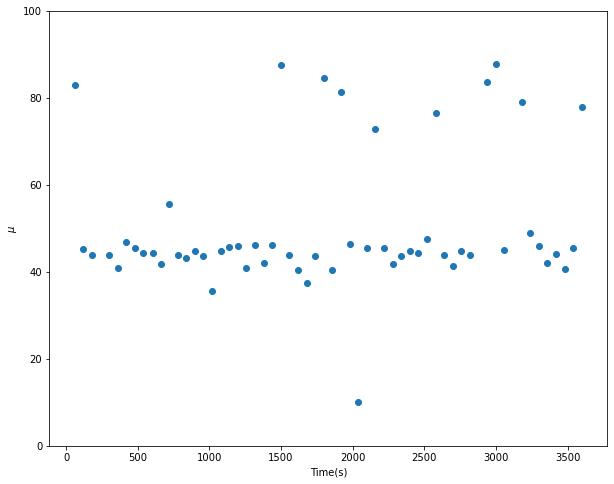

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(time_s[:-8],mu_list)
plt.xlabel('Time(s)')
plt.ylabel('$\mu$')
plt.ylim(0,100)
plt.show()

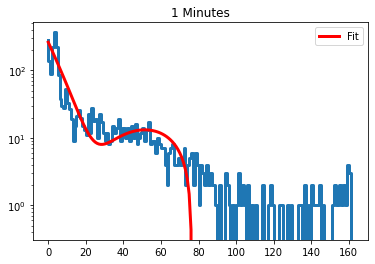

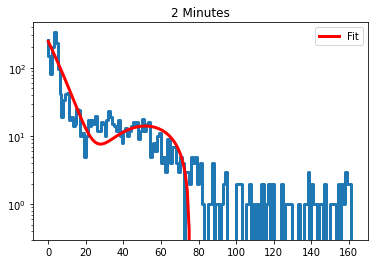

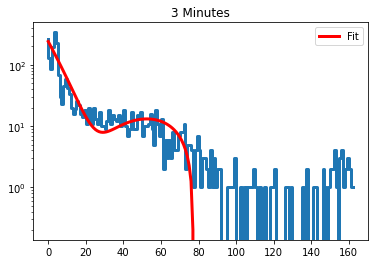

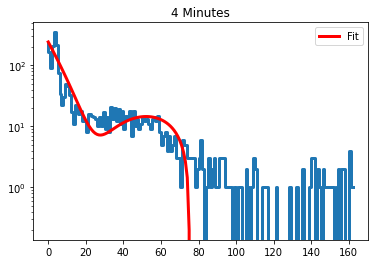

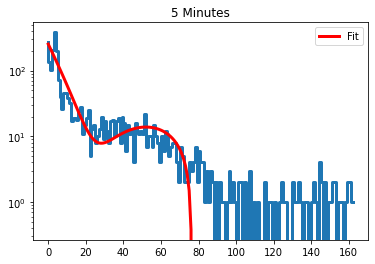

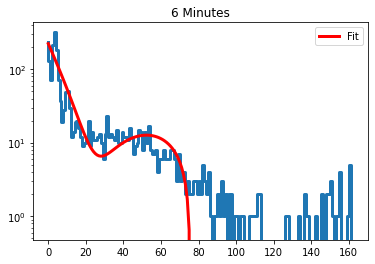

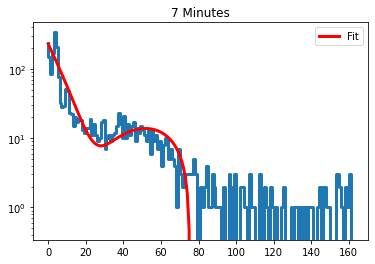

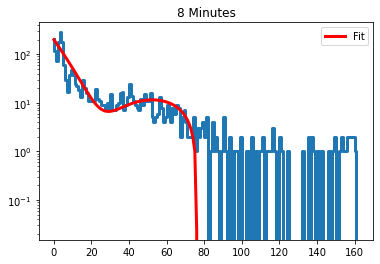

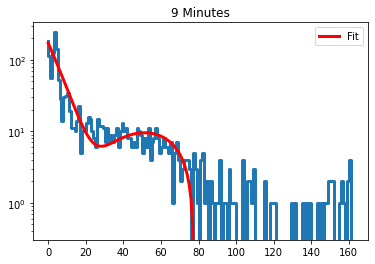

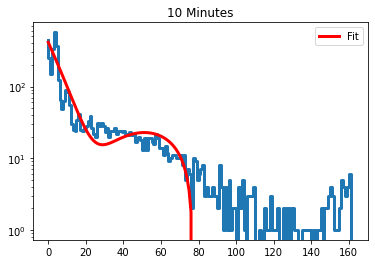

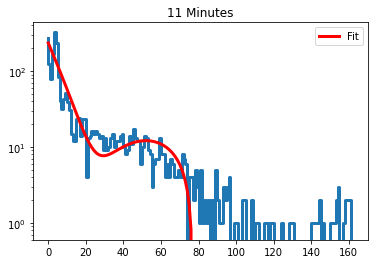

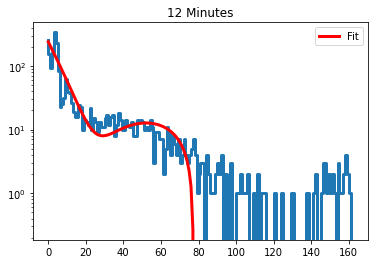

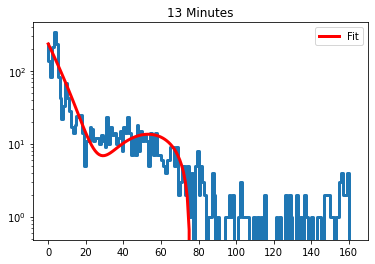

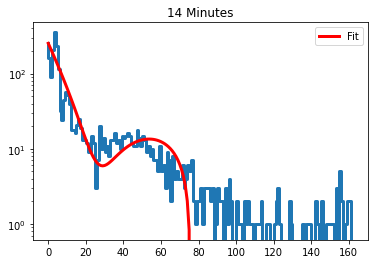

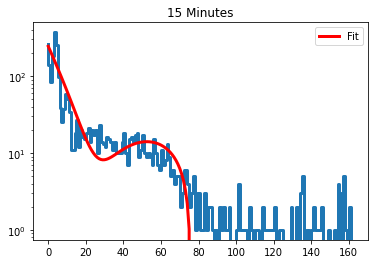

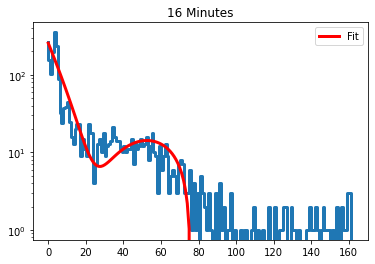

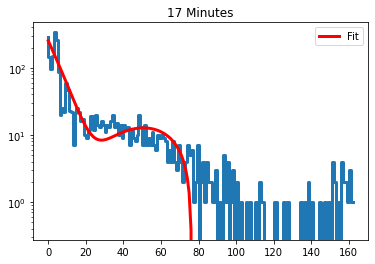

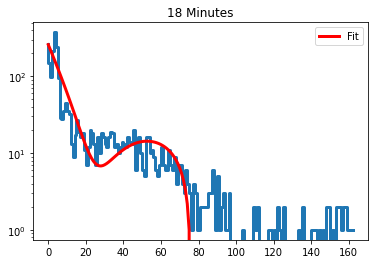

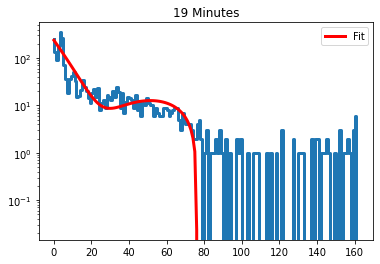

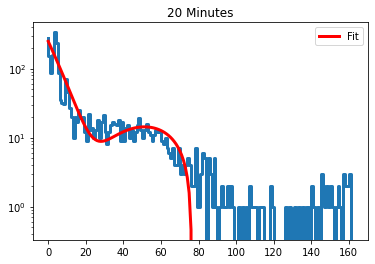

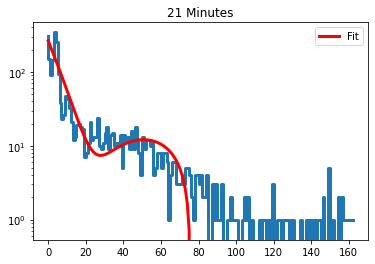

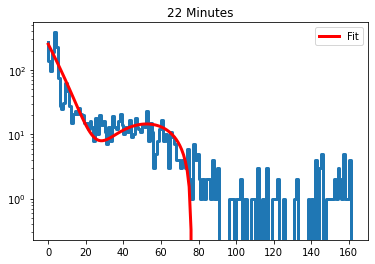

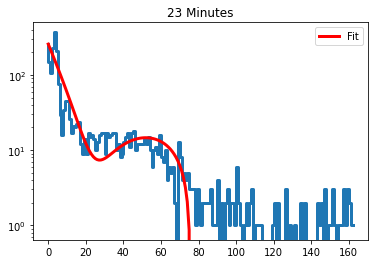

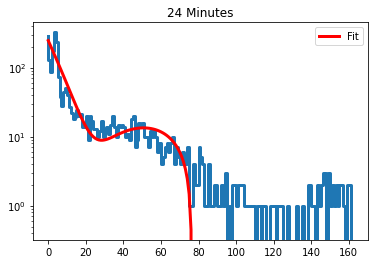

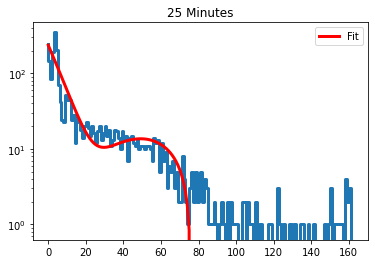

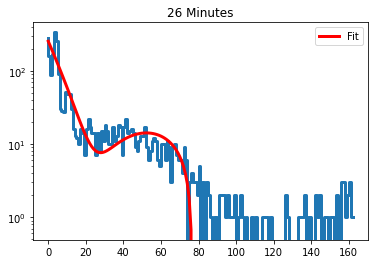

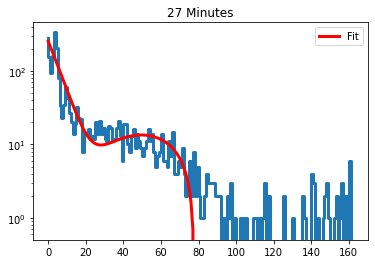

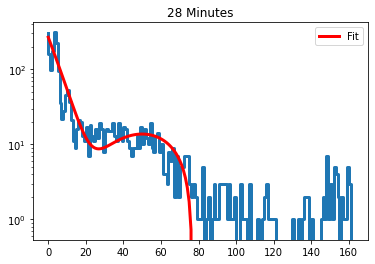

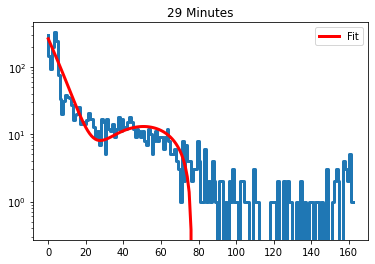

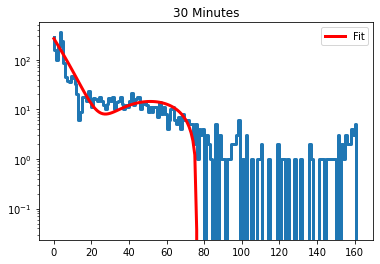

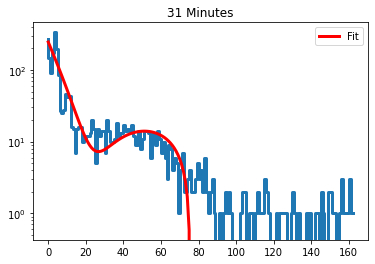

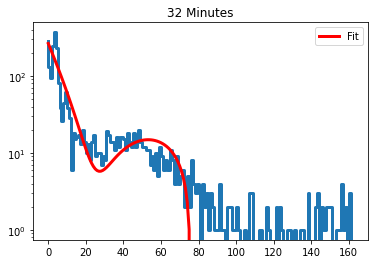

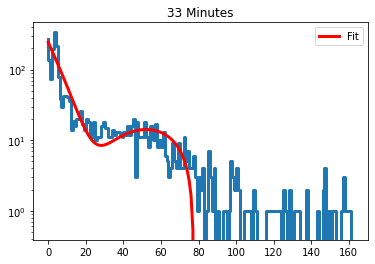

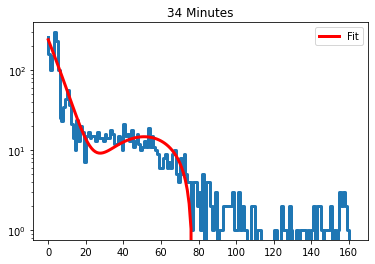

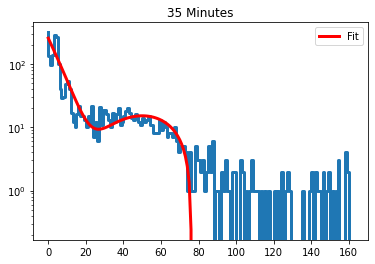

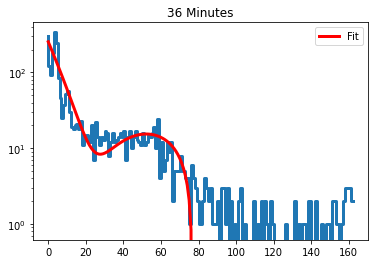

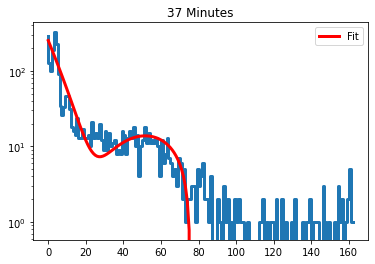

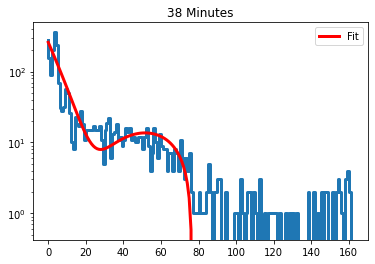

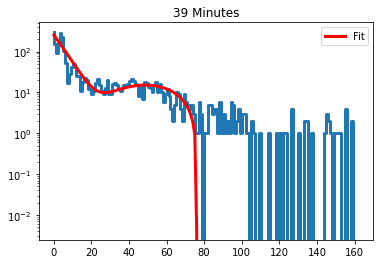

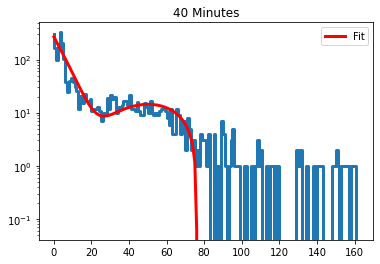

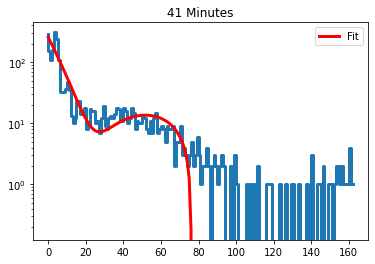

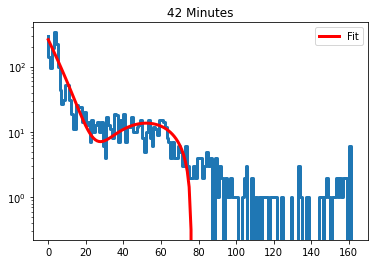

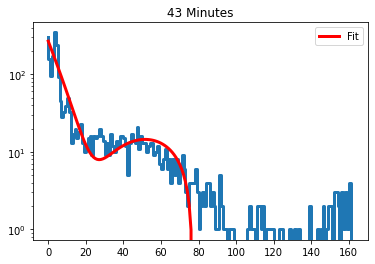

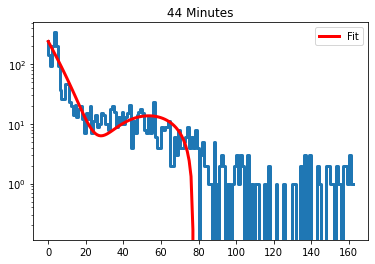

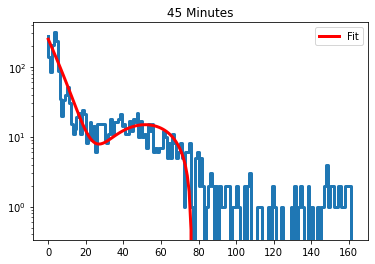

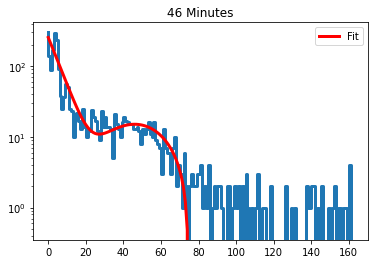

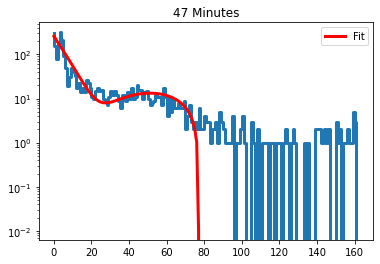

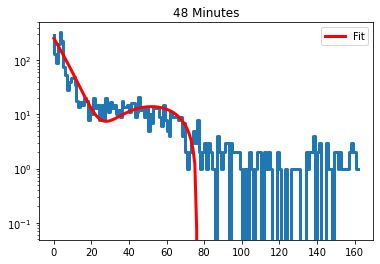

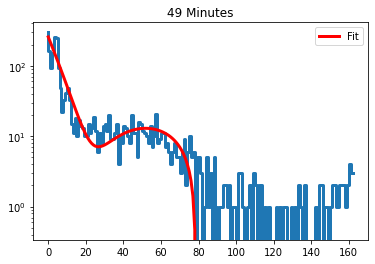

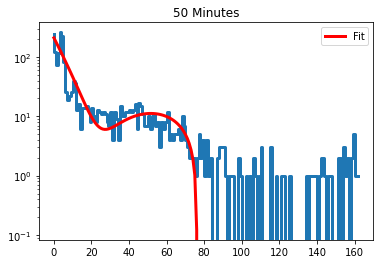

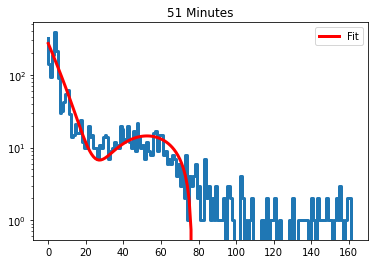

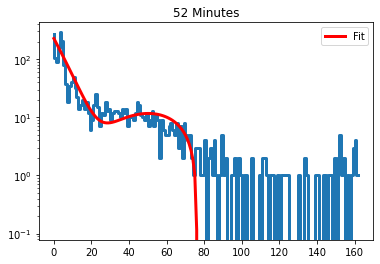

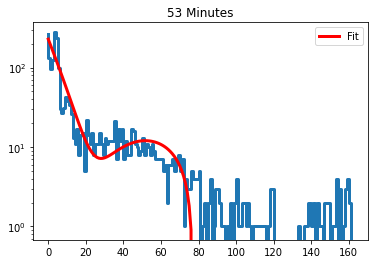

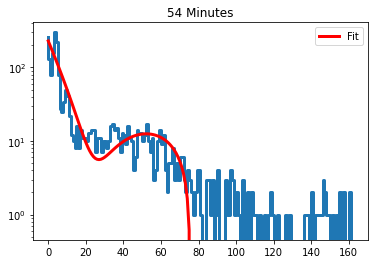

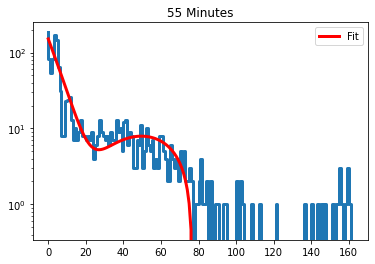

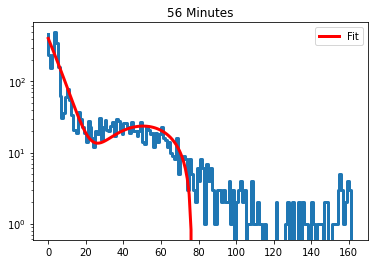

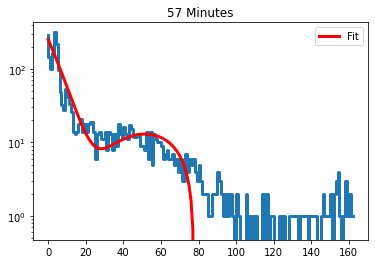

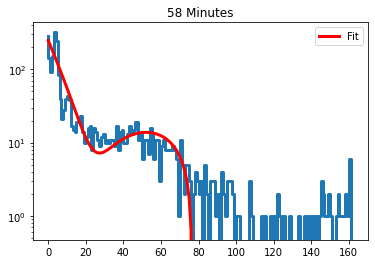

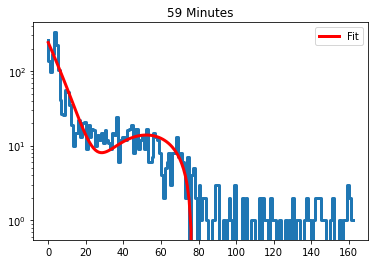

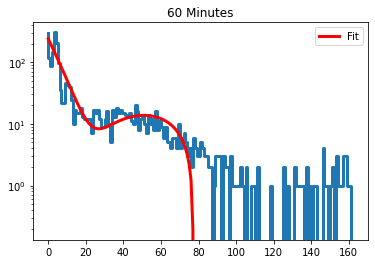

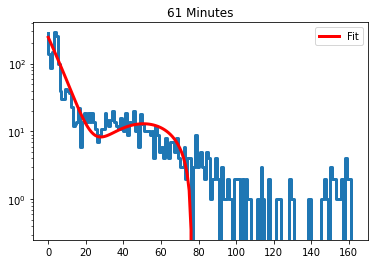

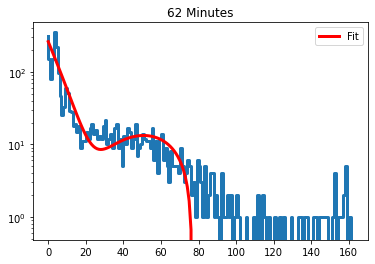

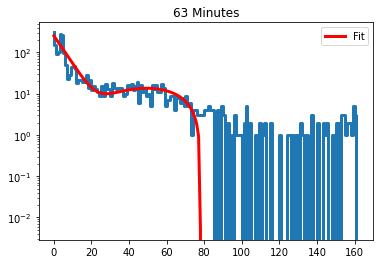

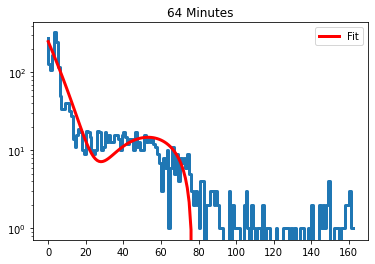

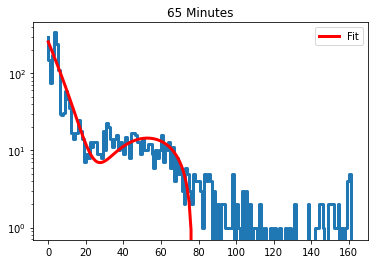

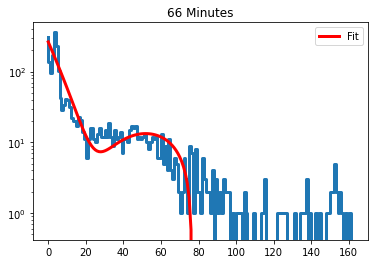

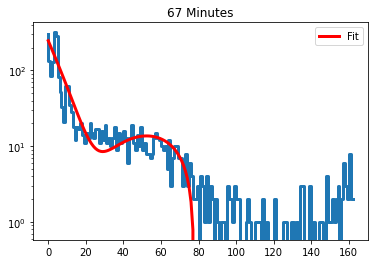

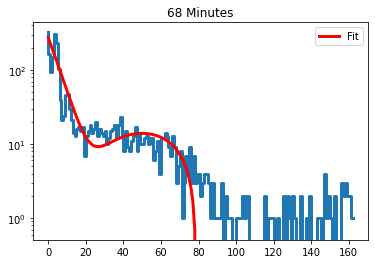

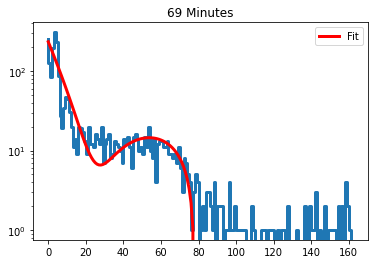

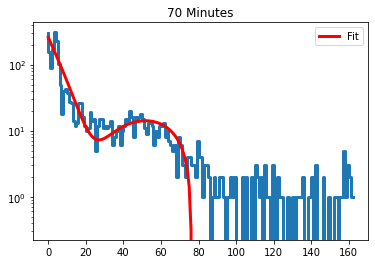

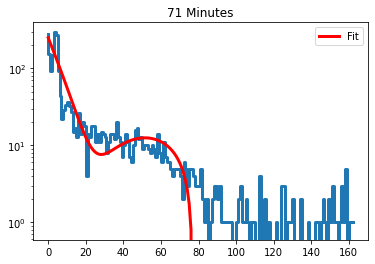

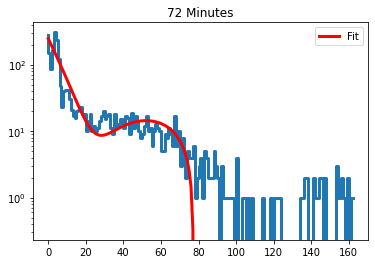

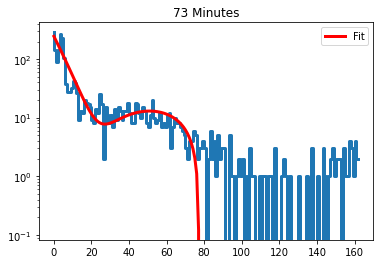

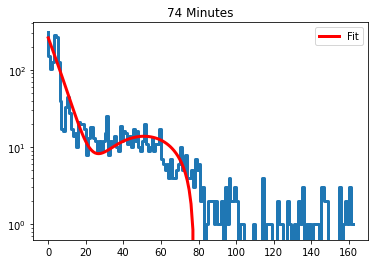

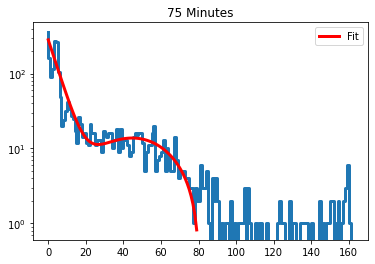

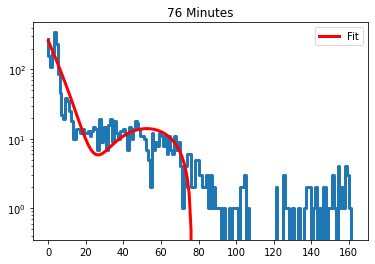

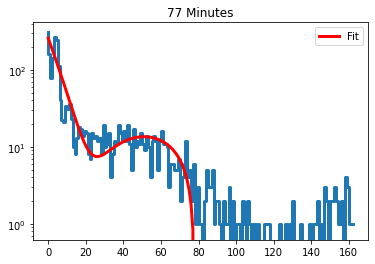

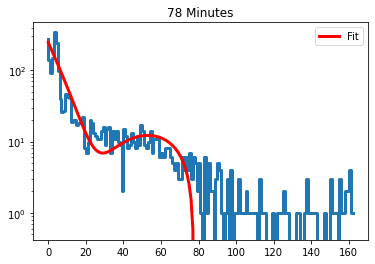

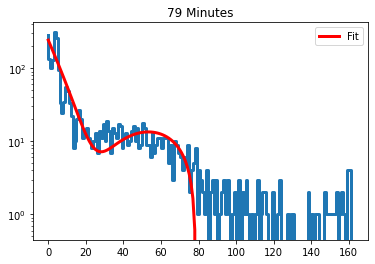

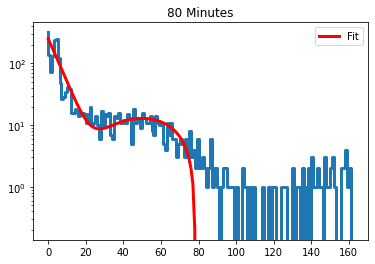

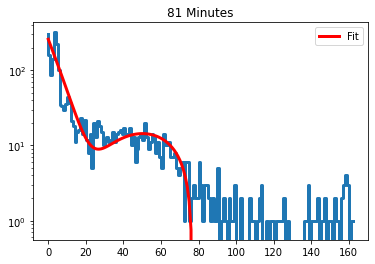

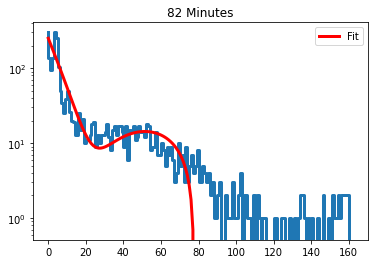

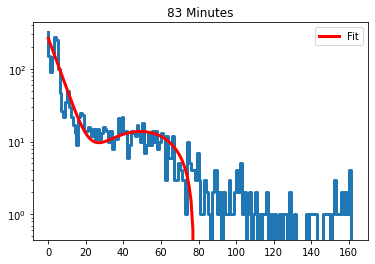

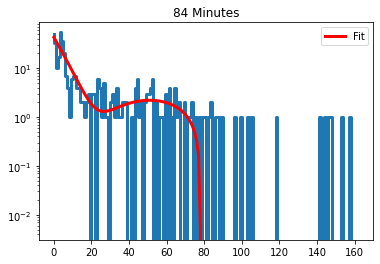

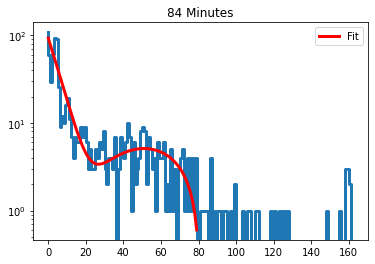

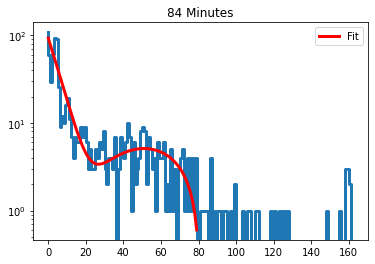

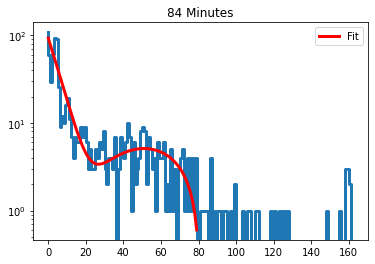

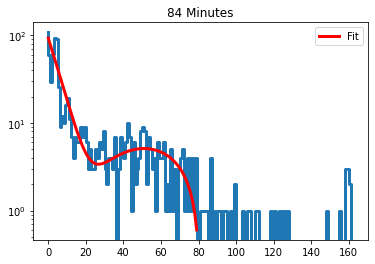

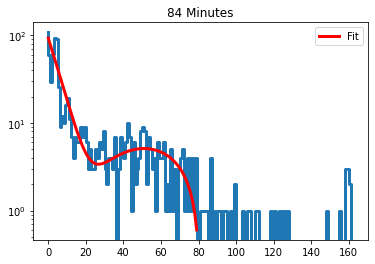

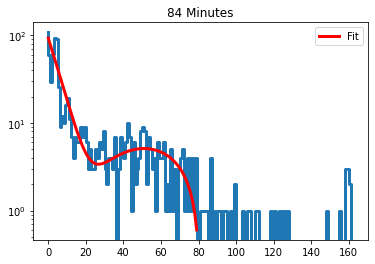

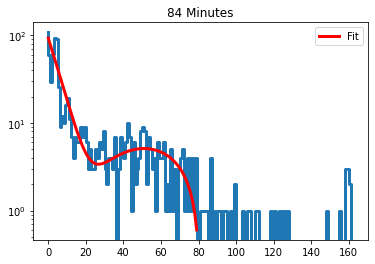

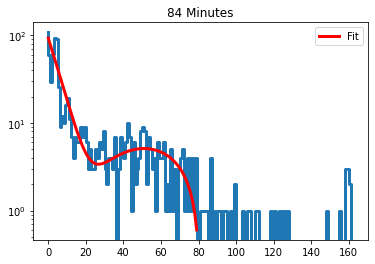

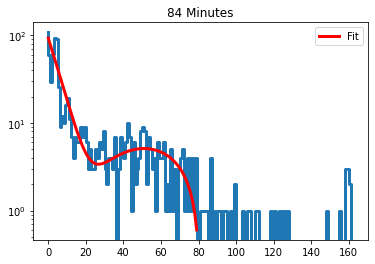

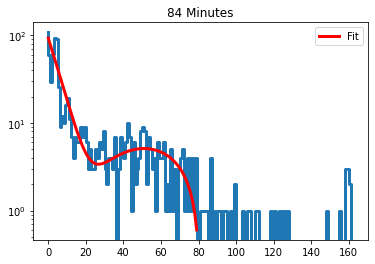

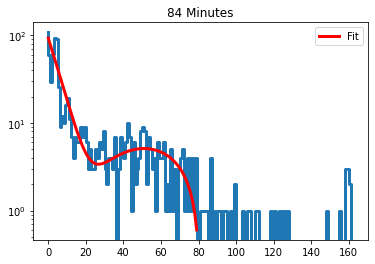

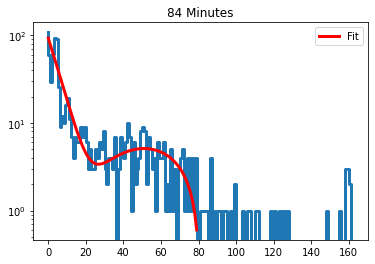

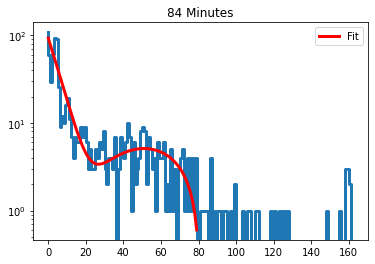

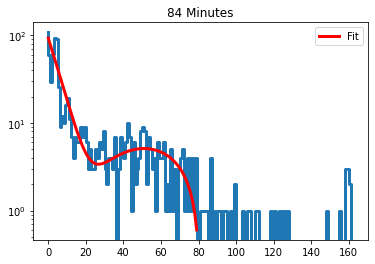

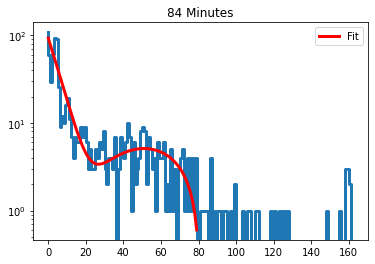

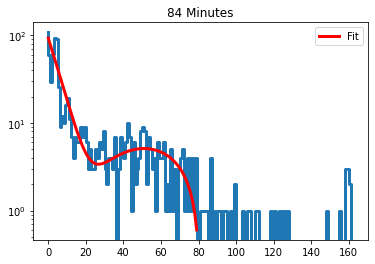

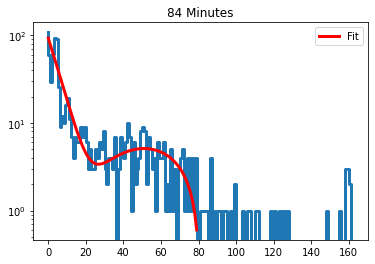

In [8]:
dir='/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20220117/source_data_field_32V/'
filename_field=[]
time_s_field=[]
popt_list_field=[]
pcov_list_field=[]
for filenames in os.listdir(dir):
    filename_field.append(dir+filenames)
for file in natsort.natsorted(filename_field):
    df=pd.read_csv(file)
    time=(str(round(int(df.columns[1])/60))+' Minutes')
    time_s_field.append(int(df.columns[1]))
    df=pd.read_csv(file,skiprows=1)
    hx,h=rebin(np.array(df['Channel']),np.array(df['Counts']),100)
    if np.max(h)!=0:
        plt.step(hx,h,lw=3)
        cut=cut=np.where((hx>=0) & (hx<80))
        popt,pcov=curve_fit(func,hx[cut],h[cut],p0=[np.max(h[cut]),0.1,2,np.max(h[cut]),50,10],maxfev=100000)
#         print(popt)
        popt_list_field.append(popt)
        pcov_list_field.append(pcov)
        plt.plot(hx[cut],func(hx[cut],*popt),color='r',zorder=10,label='Fit',lw=3)
        plt.legend(loc=1)  
        plt.title(time)
        plt.yscale('log')
        plt.show()

In [9]:
print(len(time_s_field[:-16]))

85
